### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

### 回答1：
自变量：显示颜色和文字意义是否一致  
因变量：参与者说出准确颜色所用时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

In [3]:
from scipy import stats
import pandas as pd
stroopdata =pd.read_csv('stroopdata.csv')

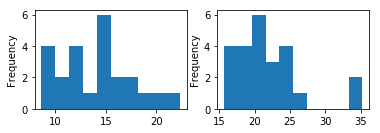

In [42]:
import matplotlib.pyplot as plt
plt.subplot(221)
stroopdata['Congruent'].plot(kind='hist')
plt.subplot(222)
stroopdata['Incongruent'].plot(kind='hist')

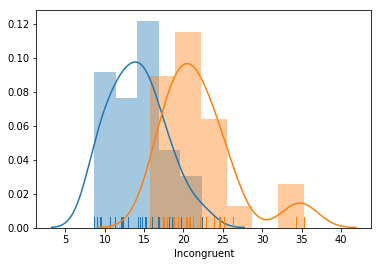

In [27]:
import seaborn as sns 
sns.distplot(stroopdata['Congruent'], rug=True)
sns.distplot(stroopdata['Incongruent'], rug=True)

### 回答2：
Ho：参与者不受打印颜色和显示文字的一致性影响 μ1-μ2=0  
H1：参与者会受颜色和显示文字的一致性影响    μ1-μ2≠0  
（μ1μ2分别代表参与者在两种条件下的总体均值）  
检验类型：执行配对样本的t检验  
原因：  
1.样本量小（已知总体数）    
2.变量前后依赖（属于同一个被测者的前后变化）  
3.大致服从正态分布（从柱状图和概率密度分布曲线看）  
4.可以计算样本均值和方差

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [2]:

stroopdata.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### 回答3：              
           mean      std  
Congruent    14.051125   3.559358  
Incongruent   22.015917   4.797057  
不一致的条件下，均值更大，方差更大

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

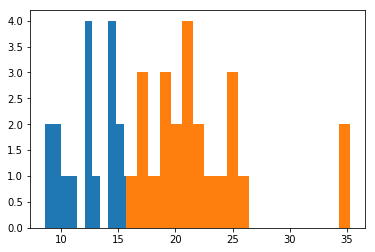

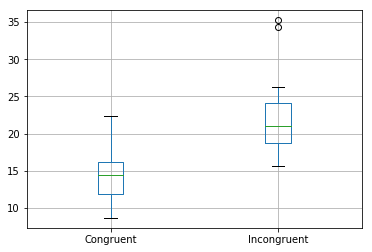

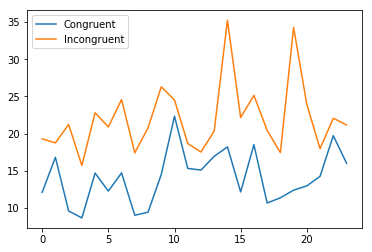

In [44]:
import pylab as plt
plt.hist(stroopdata['Congruent'],bins=20)
plt.hist(stroopdata['Incongruent'],bins=20)
plt.show()
#stroopdata.hist()
stroopdata.boxplot()
stroopdata.plot()

### 回答4：
#### 备注：谢谢提示，我觉得此处的折线图也可以直观反映前后对比的效果，箱线图可以更具体反映。（均值和四分位线更加具体和具有解释性）

由折线图可知：同一个参与者，不一致的的条件下的结果值均比一致条件下的高，部分两者值相差较大。
由箱线图可得：不一致条件下的均值和四分位线均比一致条件下高，即不一致条件下，参与者的结果值会有明显地更大值附近的集中趋势。
直方图：看不出什么诶...
即两个条件下参与者表现会有明显区别


(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [18]:
stroopdata.head()
stats.ttest_rel(stroopdata['Congruent'],stroopdata['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

### 回答5：
1.p值<α=0.05，t>t临界值=2.069。拒绝原假设，接受备择假设：颜色和显示文字的一致性会影响到参与者的判断  
2.统计检验结果和从图表中得出结论一致  
3.自由度=n-1=23